# **Installing ultrlytics**

In [ ]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 kB 5.6 MB/s eta 0:00:00


# **packages**

In [ ]:
import torch
import cv2 as cv
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# **model preprocessing**

In [ ]:
model = YOLO('yolov8s')

100%|██████████| 21.5M/21.5M [00:00<00:00, 134MB/s] 


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# **data preprocessing**

In [ ]:
!wget  -O test_image.jpg 'https://static.ca-news.org/upload/ennews/6/669656.1649052690.b.jpg'

--2024-01-22 04:42:54--  https://static.ca-news.org/upload/ennews/6/669656.1649052690.b.jpg
Resolving static.ca-news.org (static.ca-news.org)... 212.42.117.66
Connecting to static.ca-news.org (static.ca-news.org)|212.42.117.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137866 (135K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>] 134.63K   364KB/s    in 0.4s    

2024-01-22 04:42:56 (364 KB/s) - ‘test_image.jpg’ saved [137866/137866]



In [ ]:
!wget -O single.png "https://www.dropbox.com/scl/fi/iefa494nqof3lsxcw61th/photo_2023-12-23_13-20-46.jpg?rlkey=k328si1mc0woqmfbdrblorheq&dl=0"

--2024-01-22 04:42:56--  https://www.dropbox.com/scl/fi/iefa494nqof3lsxcw61th/photo_2023-12-23_13-20-46.jpg?rlkey=k328si1mc0woqmfbdrblorheq&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e548a09c70113da776e0e3e20.dl.dropboxusercontent.com/cd/0/inline/CLzg-VVhxv6Hp15t5KR_DVQ8edNJlGUd1pqe-tkuMAGcy-OJICEJtuXbw6vF6XmAT6C2gAnVL8e2zx4wDP_rsKwm7lIH4ngoHMyXx3XTij8A6EAUdLAWJZ_EPoc5hcmiuRiqhXKcyhJpAD0J3dRgFCRk/file# [following]
--2024-01-22 04:42:57--  https://uc5e548a09c70113da776e0e3e20.dl.dropboxusercontent.com/cd/0/inline/CLzg-VVhxv6Hp15t5KR_DVQ8edNJlGUd1pqe-tkuMAGcy-OJICEJtuXbw6vF6XmAT6C2gAnVL8e2zx4wDP_rsKwm7lIH4ngoHMyXx3XTij8A6EAUdLAWJZ_EPoc5hcmiuRiqhXKcyhJpAD0J3dRgFCRk/file
Resolving uc5e548a09c70113da776e0e3e20.dl.dropboxusercontent.com (uc5e548a09c70113da776e0e3e20.dl.dropboxusercontent.com)..

In [ ]:
# image preprocessing
img = Image.open('single.png')
img = np.array(img)

# **Car detection (model1)**

In [ ]:
car_detect = model(img)

# separating only cars from the predictions
cars = car_detect[0].boxes[car_detect[0].boxes.cls==2.]


0: 288x640 4 cars, 909.1ms
Speed: 29.3ms preprocess, 909.1ms inference, 33.9ms postprocess per image at shape (1, 3, 288, 640)


In [ ]:
#drawing bbox
def draw_bbox(img, labels):

  x = 0
  while x < len(labels):
    for i in labels:
      img = cv.rectangle(img, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), color=[0,255,0], thickness=2)

      img = cv.putText(img, 'car', org=(int(i[0]), int(i[1]) - 5),
                       fontFace=int(img.shape[0] ** .15),
                       fontScale=int(img.shape[0] ** .1),
                       color=[255,0,0],
                       thickness=int(img.shape[0] ** .1))

      font = cv.FONT_HERSHEY_SIMPLEX
    x += 1

  return img

In [ ]:
img1 = draw_bbox(img, labels=cars.xyxy)

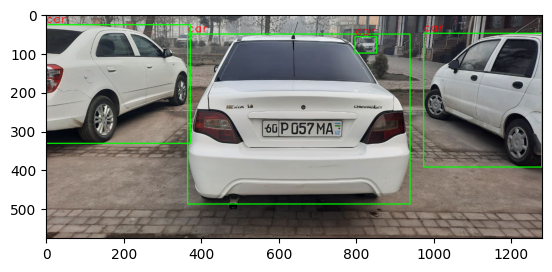

In [ ]:
plt.imshow(img1)
plt.show()

# **Licence plate detection (model 2)**

In [ ]:
# !wget -O licence.pt  'https://hub.ultralytics.com/models/3LuRsG44En0vpyEhtpmt'

--2023-12-12 13:57:32--  https://hub.ultralytics.com/models/3LuRsG44En0vpyEhtpmt
Resolving hub.ultralytics.com (hub.ultralytics.com)... 151.101.65.195, 151.101.1.195
Connecting to hub.ultralytics.com (hub.ultralytics.com)|151.101.65.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2267 (2.2K) [text/html]
Saving to: ‘licence.pt’

licence.pt          100%[===================>]   2.21K  --.-KB/s    in 0s      

2023-12-12 13:57:32 (31.6 MB/s) - ‘licence.pt’ saved [2267/2267]



In [ ]:
model2 = YOLO('licence.pt')

In [ ]:
licence_detect = model2(img)


0: 288x640 1 Number, 469.2ms
Speed: 2.2ms preprocess, 469.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)


In [ ]:
licence_detect[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.7913])
data: tensor([[552.9281, 267.5557, 767.8365, 318.7823,   0.7913,   0.0000]])
id: None
is_track: False
orig_shape: (576, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[660.3823, 293.1690, 214.9084,  51.2266]])
xywhn: tensor([[0.5159, 0.5090, 0.1679, 0.0889]])
xyxy: tensor([[552.9281, 267.5557, 767.8365, 318.7823]])
xyxyn: tensor([[0.4320, 0.4645, 0.5999, 0.5534]])

In [ ]:
#drawing bbox for licence plate
def draw_bbox_lp(img, labels):

  x = 0
  while x < len(labels):
    for i in labels:
      img = cv.rectangle(img, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), color=[0,255,0], thickness=int(img.shape[0] ** .2))

      img = cv.putText(img, 'number', org=(int(i[0]), int(i[1]) - 5),
                       fontFace=int(img.shape[0] ** .11),
                       fontScale=int(img.shape[0] ** .1),
                       color=[255,0,0],
                       thickness=int(img.shape[0] ** .15))

      font = cv.FONT_HERSHEY_SIMPLEX

    x += 1

  return img

In [ ]:
img2 = draw_bbox_lp(img1, licence_detect[0].boxes.xyxy)

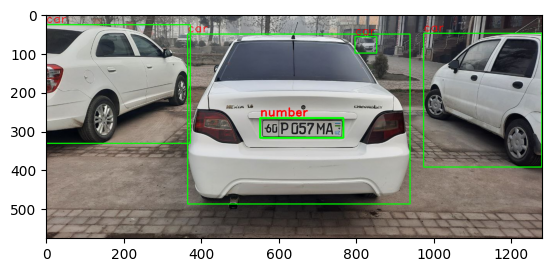

In [ ]:
plt.imshow(img2)
plt.show()

In [ ]:
x1, y1, x2, y2 = licence_detect[0].boxes.xyxy[0].numpy()

licence_plate = img2[int(x1):int(x2), int(y1):int(x2)]

In [ ]:
x1 = int(x1)
y1 = int(y1)
x2 = int(x2)
y2 = int(y2)

w = int(x2 - x1)
h = int(y2 - y1)

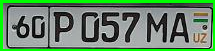

In [ ]:
crop_img = img1[y1:y1+h, x1:x1+w]
cv2_imshow(crop_img)

In [ ]:
print(true_seq)

['six', 'zero', 'P', 'zero', 'five', 'seven', 'M', 'A']


In [ ]:
print(converted_list)

['6', '0', 'P', '0', '5', '7', 'M', 'A']


In [ ]:
print(actual_num)

60P057MA


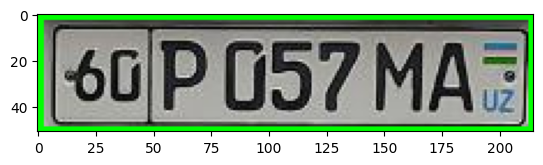

In [ ]:
plt.imshow(crop_img)
plt.show()

# **Alpha-numeric detection (model 3)**

In [ ]:
model3 = YOLO('alpha_num.pt')

In [ ]:
alpha = model3(crop_img)


0: 160x640 2 zeros, 1 five, 1 six, 1 seven, 1 A, 1 M, 1 P, 228.9ms
Speed: 3.5ms preprocess, 228.9ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 640)


In [ ]:
mixed_result = [alpha[0].names.get(int(x)) for x in alpha[0].boxes.cls]
print(mixed_result)

['M', 'zero', 'six', 'seven', 'zero', 'five', 'A', 'P']


In [ ]:
list_z = list(zip(alpha[0].boxes.cls.numpy(), alpha[0].boxes.xyxy.numpy()))
print(list_z)

[(22.0, array([     143.95,      10.517,       168.9,      44.323], dtype=float32)), (0.0, array([      30.59,      13.549,      46.164,      40.361], dtype=float32)), (6.0, array([     15.765,      13.951,      30.257,      40.331], dtype=float32)), (7.0, array([     120.35,      10.365,      142.31,      44.173], dtype=float32)), (0.0, array([     79.779,      9.6994,      100.33,      43.799], dtype=float32)), (5.0, array([     100.32,      9.8708,      120.39,      43.587], dtype=float32)), (10.0, array([     168.91,      10.973,       191.1,      44.326], dtype=float32)), (25.0, array([     51.908,      9.7735,      75.368,      44.176], dtype=float32))]


In [ ]:
list_z

[(22.0,
  array([     143.95,      10.517,       168.9,      44.323], dtype=float32)),
 (0.0,
  array([      30.59,      13.549,      46.164,      40.361], dtype=float32)),
 (6.0,
  array([     15.765,      13.951,      30.257,      40.331], dtype=float32)),
 (7.0,
  array([     120.35,      10.365,      142.31,      44.173], dtype=float32)),
 (0.0,
  array([     79.779,      9.6994,      100.33,      43.799], dtype=float32)),
 (5.0,
  array([     100.32,      9.8708,      120.39,      43.587], dtype=float32)),
 (10.0,
  array([     168.91,      10.973,       191.1,      44.326], dtype=float32)),
 (25.0,
  array([     51.908,      9.7735,      75.368,      44.176], dtype=float32))]

In [ ]:
cls = sorted(list_z, key=lambda x: x[1][0])
list_x = []
for cl, box in cls:
    list_x.append(int(cl))

print(list_x)

[6, 0, 25, 0, 5, 7, 22, 10]


In [ ]:
true_seq = [alpha[0].names.get(y) for y in list_x]
print(true_seq)

['six', 'zero', 'P', 'zero', 'five', 'seven', 'M', 'A']


In [ ]:
# Mapping of string numbers to their integer representations
number_mapping = {
    'zero': '0',
    'one': '1',
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'seven': '7',
    'eight': '8',
    'nine': '9',
    # Add more numbers as needed
}

# Your original list
original_list = true_seq

# Convert string numbers to integers while keeping other items unchanged
converted_list = [number_mapping[item] if item in number_mapping else item for item in original_list]

# Print the result
print(converted_list)

['6', '0', 'P', '0', '5', '7', 'M', 'A']


In [ ]:
actual_num = "".join(converted_list)

# **Detecting licence number**

In [ ]:
#drawing bbox for licence number
def draw_bbox_ln(img, labels):

  x = 0
  while x < len(labels):
    for i in labels:
      img = cv.rectangle(img, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), color=[0,255,0], thickness=int(img.shape[0] ** .2))

      img = cv.putText(img, actual_num, org=(int(i[0]), int(i[1]) - 5),
                       fontFace=int(img.shape[0] ** .1),
                       fontScale=int(img.shape[0] ** .14),
                       color=[255,0,0],
                       thickness=int(img.shape[0] ** .17))

      font = cv.FONT_HERSHEY_SIMPLEX

    x += 1

  return img

In [ ]:
img = cv.imread('single.png')
img = np.array(img)

In [ ]:
img3 = draw_bbox_ln(img, licence_detect[0].boxes.xyxy)

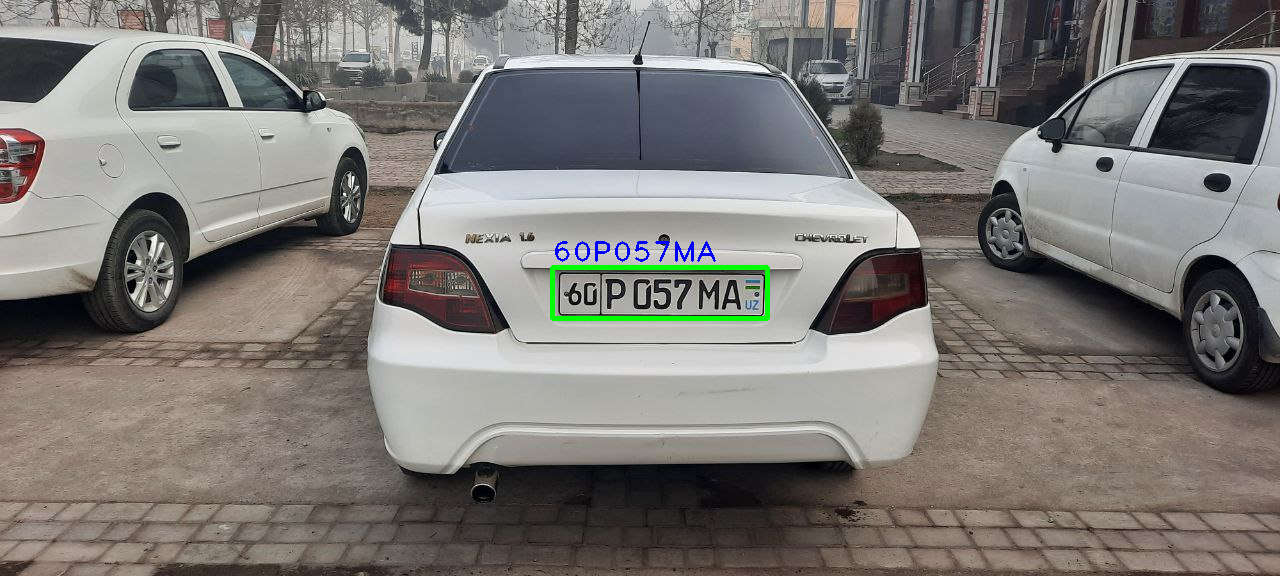

In [ ]:
cv2_imshow(img3)